### Homework 5

In [211]:
import numpy as np
from numpy import random
from scipy.integrate import quad
# define V(x) entropy
def V(x):
    return ((x**4) - (x**2) - (0.4*x))

NORMALIZE, error = quad(lambda x: np.exp(-1*V(x)), -np.inf, np.inf)

# define target distribution f
# no need to normalize
def f1(x):
    return np.exp(-0.5 * x**2)
def f2(x):
    return np.exp(-1*V(x))

In [212]:
# TODO: define g and q_indep / q_rwmh densities
#       create functions to sample from each q
def g(y, sigma2):
    return ( 1/np.sqrt(2*np.pi*sigma2) ) * np.exp(-1*((y**2) / (2*sigma2)))

def q_indep(x, z, sigma2):
    return g(z, sigma2)
# Normal and independent; always centered around 0
def q_indep_sample(x, sigma2):
    return random.normal(0, sigma2)

def q_rwmh(x, z, sigma2):
    return g(z-x, sigma2)
# Normal centered around current state
def q_rwmh_sample(x, sigma2):
    return random.normal(x, sigma2)

In [213]:
# pi_0 is deterministic starting at the origin

def metropolis_hastings(f, q, q_samp, N, sigma2, x0=0):
    X = np.zeros(N, dtype=float)
    X[0] = x0

    for n in range(N-1):
        # get current x
        x_n = X[n]
        # sample Z from q
        z = q_samp(x_n, sigma2)
        # accept/reject
        num = (f(z) * q(z, x_n, sigma2))
        den = (f(x_n) * q(x_n, z, sigma2))
        check = 0 if den == 0 else (num/den)
        a = min(1, check)
        # get a number 0 to 1 and check
        if random.uniform(0,1) < a:
            X[n+1] = z
        else:
            X[n+1] = x_n
    return X

In [214]:
sigmas2 = [2.4, 240]
N = 1000
T = 50
def run_metro_hast(f, q, q_samp, sigma2, N=1000, T=50):
    samples = np.zeros(N)
    for n in range(N):
        X = metropolis_hastings(f=f, q=q, q_samp=q_samp, N=T, sigma2=sigma2)
        samples[n] = X[T-1]

    return samples

f1_indep_samples_s1 = run_metro_hast(f=f1, q=q_indep, q_samp=q_indep_sample, sigma2=sigmas2[0])
f2_indep_samples_s1 = run_metro_hast(f=f2, q=q_indep, q_samp=q_indep_sample, sigma2=sigmas2[0])

f1_indep_samples_s2 = run_metro_hast(f=f1, q=q_indep, q_samp=q_indep_sample, sigma2=sigmas2[1])
f2_indep_samples_s2 = run_metro_hast(f=f2, q=q_indep, q_samp=q_indep_sample, sigma2=sigmas2[1])

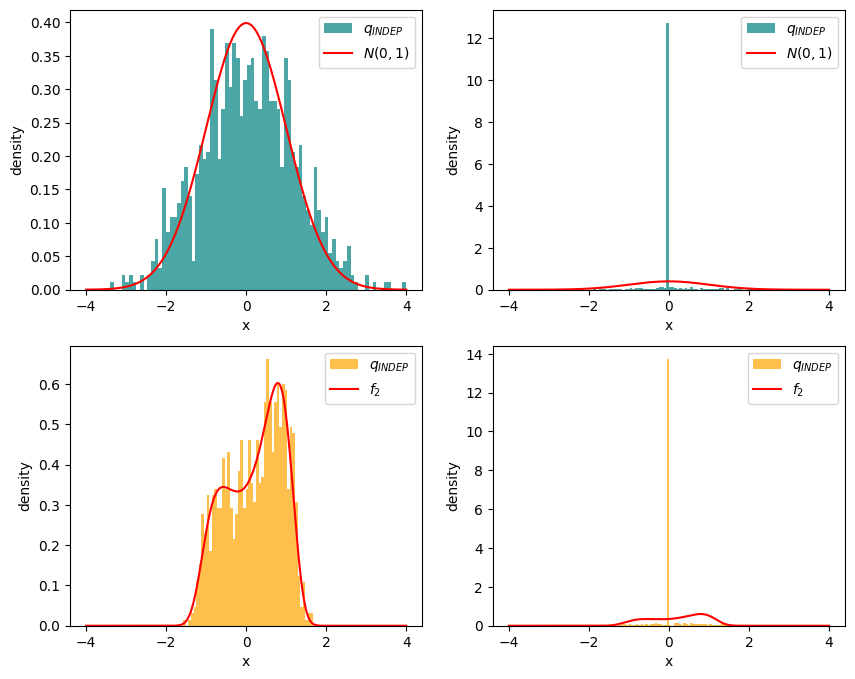

In [215]:
import matplotlib.pyplot as plt
from scipy.stats import norm

fig, axes = plt.subplots(2, 2, figsize=(10, 8))

norm_x = np.linspace(-4, 4, 400)
norm_y = norm.pdf(norm_x, loc=0, scale=1)

axes[0,0].hist(f1_indep_samples_s1, density=True, bins=80, alpha=0.7, color='teal', label='$q_{INDEP}$')
axes[0,1].hist(f1_indep_samples_s2, density=True, bins=80, alpha=0.7, color='teal', label='$q_{INDEP}$')

for ax in axes[0,:]:
    ax.plot(norm_x, norm_y, 'r', label='$N(0,1)$')
    ax.set_xlabel('x')
    ax.set_ylabel('density')
    ax.legend()

f2_x = np.linspace(-4, 4, 400)
f2_y = f2(f2_x) / NORMALIZE

axes[1,0].hist(f2_indep_samples_s1, density=True, bins=50, alpha=0.7, color='orange', label='$q_{INDEP}$')
axes[1,1].hist(f2_indep_samples_s2, density=True, bins=50, alpha=0.7, color='orange', label='$q_{INDEP}$')

for ax in axes[1,:]:
    ax.plot(f2_x, f2_y, 'r', label='$f_2$')
    ax.set_xlabel('x')
    ax.set_ylabel('density')
    ax.legend()


plt.show()

In [216]:
f1_rwmh_samples_s1 = run_metro_hast(f=f1, q=q_rwmh, q_samp=q_rwmh_sample, sigma2=sigmas2[0])
f2_rwmh_samples_s1 = run_metro_hast(f=f2, q=q_rwmh, q_samp=q_rwmh_sample, sigma2=sigmas2[0])

f1_rwmh_samples_s2 = run_metro_hast(f=f1, q=q_rwmh, q_samp=q_rwmh_sample, sigma2=sigmas2[1])
f2_rwmh_samples_s2 = run_metro_hast(f=f2, q=q_rwmh, q_samp=q_rwmh_sample, sigma2=sigmas2[1])

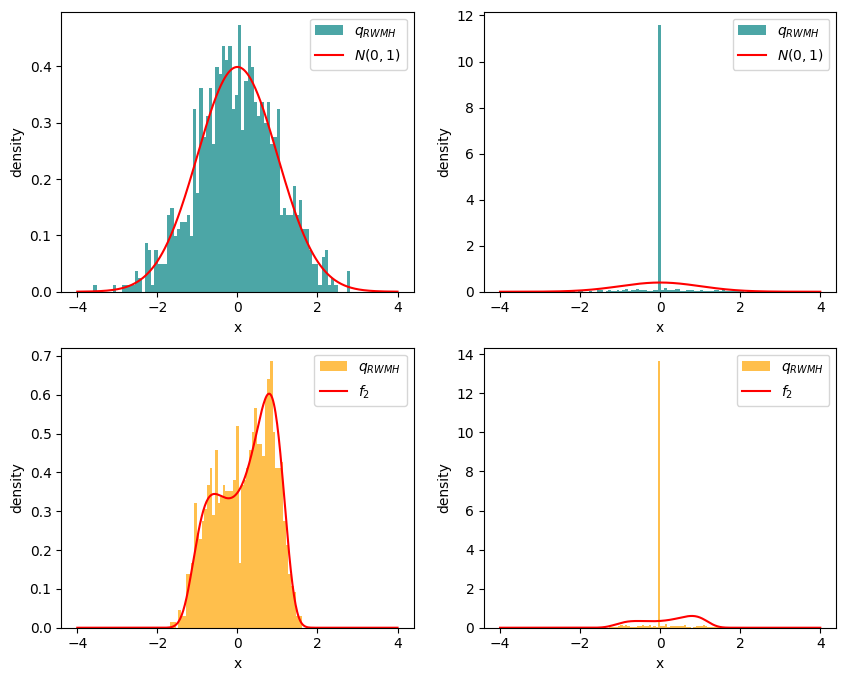

In [217]:
fig, axes = plt.subplots(2, 2, figsize=(10, 8))

norm_x = np.linspace(-4, 4, 400)
norm_y = norm.pdf(norm_x, loc=0, scale=1)

axes[0,0].hist(f1_rwmh_samples_s1, density=True, bins=80, alpha=0.7, color='teal', label='$q_{RWMH}$')
axes[0,1].hist(f1_rwmh_samples_s2, density=True, bins=80, alpha=0.7, color='teal', label='$q_{RWMH}$')

for ax in axes[0,:]:
    ax.plot(norm_x, norm_y, 'r', label='$N(0,1)$')
    ax.set_xlabel('x')
    ax.set_ylabel('density')
    ax.legend()

f2_x = np.linspace(-4, 4, 400)
f2_y = f2(f2_x) / NORMALIZE

axes[1,0].hist(f2_rwmh_samples_s1, density=True, bins=50, alpha=0.7, color='orange', label='$q_{RWMH}$')
axes[1,1].hist(f2_rwmh_samples_s2, density=True, bins=50, alpha=0.7, color='orange', label='$q_{RWMH}$')

for ax in axes[1,:]:
    ax.plot(f2_x, f2_y, 'r', label='$f_2$')
    ax.set_xlabel('x')
    ax.set_ylabel('density')
    ax.legend()


plt.show()

In [218]:
# algorithm convergence
random.seed(42)

M = 20
R = 50
def h(x):
    return x**2

for qs, f, sigma in zip(([q_indep, q_indep_sample, 'q_indep'], [q_rwmh, q_rwmh_sample, 'q_rwmh']),\
                        ([f1,'f1'],[f2,'f2']),(2.4, 240)):
    chain = metropolis_hastings(f=f[0], q=qs[0], q_samp=qs[1], N=(M+2*R), sigma2=sigma)
    conv = np.abs( (np.sum(h(chain[M:M+R])) / R) - (np.sum(h(chain[M+R:M+(2*R)])) / R) )
    print(f"{f[1]}, {qs[2]}")

q_indep_s1 = metropolis_hastings(f=f1, q=q_indep, q_samp=q_indep_sample, N=(M+2*R), sigma2=2.4)
q_indep_s1_conv = np.abs( (np.sum(h(q_indep_s1[M:M+R])) / R) - (np.sum(h(q_indep_s1[M+R:M+(2*R)])) / R) )

print(f"q_INDEP, sigma^2=2.4: {q_indep_s1_conv}")

q_indep_s2 = metropolis_hastings(f=f1, q=q_indep, q_samp=q_indep_sample, N=(M+2*R), sigma2=240)
q_indep_s2_conv = np.abs( (np.sum(h(q_indep_s2[M:M+R])) / R) - (np.sum(h(q_indep_s2[M+R:M+(2*R)])) / R) )

print(f"q_INDEP, sigma^2=2.4: {q_indep_s2_conv}")

q_indep_s2 = metropolis_hastings(f=f1, q=q_indep, q_samp=q_indep_sample, N=(M+2*R), sigma2=240)
q_indep_s2_conv = np.abs( (np.sum(h(q_indep_s2[M:M+R])) / R) - (np.sum(h(q_indep_s2[M+R:M+(2*R)])) / R) )

print(f"q_INDEP, sigma^2=2.4: {q_indep_s2_conv}")

q_indep_s2 = metropolis_hastings(f=f1, q=q_indep, q_samp=q_indep_sample, N=(M+2*R), sigma2=240)
q_indep_s2_conv = np.abs( (np.sum(h(q_indep_s2[M:M+R])) / R) - (np.sum(h(q_indep_s2[M+R:M+(2*R)])) / R) )

print(f"q_INDEP, sigma^2=2.4: {q_indep_s2_conv}")

f1, q_indep
f2, q_rwmh
q_INDEP, sigma^2=2.4: 0.08362455610728392
q_INDEP, sigma^2=2.4: 0.0
q_INDEP, sigma^2=2.4: 0.34387271617384935
q_INDEP, sigma^2=2.4: 0.0


In [219]:
random.seed(42)
from itertools import product

for qs, sigma in product(([q_indep, q_indep_sample, 'q_indep'], [q_rwmh, q_rwmh_sample, 'q_rwmh']),(2.4, 240)):
    chain = metropolis_hastings(f=f1, q=qs[0], q_samp=qs[1], N=(M+2*R), sigma2=sigma)
    conv = np.abs( (np.sum(h(chain[M:M+R])) / R) - (np.sum(h(chain[M+R:M+(2*R)])) / R) )
    print(f"f1, {qs[2]}, sigma={sigma}: {conv}")

print("-------------------------------")

for qs, sigma in product(([q_indep, q_indep_sample, 'q_indep'], [q_rwmh, q_rwmh_sample, 'q_rwmh']),(2.4, 240)):
    chain = metropolis_hastings(f=f2, q=qs[0], q_samp=qs[1], N=(M+2*R), sigma2=sigma)
    conv = np.abs( (np.sum(h(chain[M:M+R])) / R) - (np.sum(h(chain[M+R:M+(2*R)])) / R) )
    print(f"f2, {qs[2]}, sigma={sigma}: {conv}")

f1, q_indep, sigma=2.4: 0.05818338321757799
f1, q_indep, sigma=240: 0.0
f1, q_rwmh, sigma=2.4: 0.04827482563133534
f1, q_rwmh, sigma=240: 0.0
-------------------------------
f2, q_indep, sigma=2.4: 0.08368402741364067
f2, q_indep, sigma=240: 0.0
f2, q_rwmh, sigma=2.4: 0.012712847479914136
f2, q_rwmh, sigma=240: 0.14429559283386795


#### Question 2

In [ ]:
# unadjusted lavengian in one dimension
# pi0 is deterministic at the origin, so x0=0
def V1(x):
    return -0.5*(x**2)
def V2(x):
    return ((x**4) - (x**2) - (0.4*x))

def grad_V1(x):
    return -1*x
def grad_V2(x):
    return (4*(x**3)) - (2*x) - 0.4

def lavengian(grad_V, epsilon, N, x0=0):
    X = np.zeros(N)
    Z = random.normal(0,1,N-1)
    X[0] = x0
    for n in range(N-1):
        X[n+1] = X[n] - (epsilon * grad_V(X[n])) + (np.sqrt(2*epsilon)*Z[n])
    return X


In [273]:
def run_lavengian(grad_V, epsilon, N, T, x0=0):
    samples = np.zeros(N)
    for n in range(N):
        X = lavengian(grad_V=grad_V, epsilon=epsilon, N=T)
        samples[n] = X[T-1]
    return samples

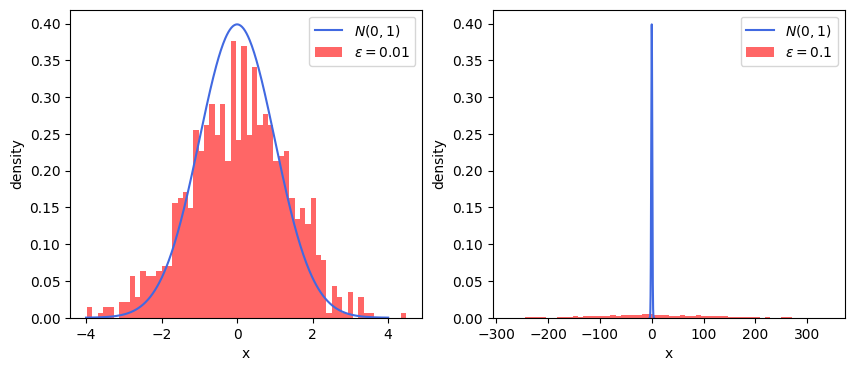

In [274]:
T, N = 50, 1000

f1_e1 = run_lavengian(grad_V=grad_V1, epsilon=0.01, N=N, T=T)
f1_e2 = run_lavengian(grad_V=grad_V1, epsilon=0.1, N=N, T=T)

fig, axes = plt.subplots(1, 2, figsize=(10, 4))

axes[0].plot(norm_x, norm_y, color='royalblue', label='$N(0,1)$')
axes[0].hist(f1_e1, density=True, bins=60, alpha=0.6, color='red', label='$ε=0.01$')

axes[1].plot(norm_x, norm_y, color='royalblue', label='$N(0,1)$')
axes[1].hist(f1_e2, density=True, bins=60, alpha=0.6, color='red', label='$ε=0.1$')

for ax in axes:
    ax.set_xlabel('x')
    ax.set_ylabel('density')
    ax.legend()

/var/folders/y8/5sdb2rg957jchm7dmvcshj7h0000gn/T/ipykernel_73880/1471992743.py:11: RuntimeWarning: overflow encountered in scalar power
  return (4*(x**3)) - (2*x) - 0.4
/var/folders/y8/5sdb2rg957jchm7dmvcshj7h0000gn/T/ipykernel_73880/1471992743.py:11: RuntimeWarning: invalid value encountered in scalar subtract
  return (4*(x**3)) - (2*x) - 0.4


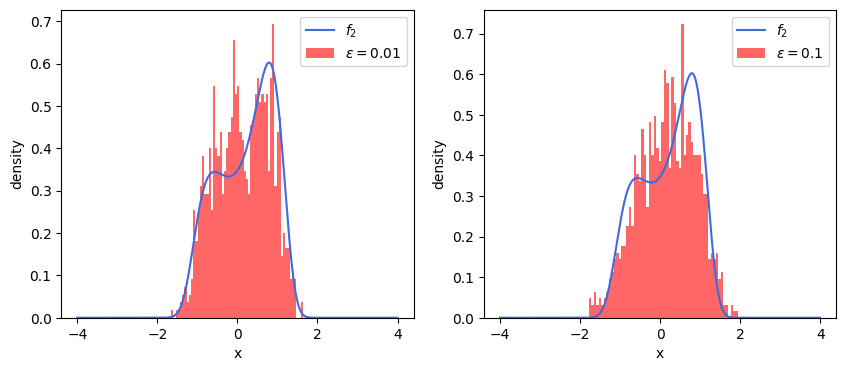

In [287]:
T, N = 50, 1000

f2_e1 = run_lavengian(grad_V=grad_V2, epsilon=0.01, N=N, T=T)
f2_e2 = run_lavengian(grad_V=grad_V2, epsilon=0.1, N=N, T=T)

fig, axes = plt.subplots(1, 2, figsize=(10, 4))

axes[0].plot(f2_x, f2_y, color='royalblue', label='$f_2$')
axes[0].hist(f2_e1, density=True, bins=60, alpha=0.6, color='red', label='$ε=0.01$')

axes[1].plot(f2_x, f2_y, color='royalblue', label='$f_2$')
axes[1].hist(f2_e2, density=True, bins=60, alpha=0.6, color='red', label='$ε=0.1$')

for ax in axes:
    ax.set_xlabel('x')
    ax.set_ylabel('density')
    ax.legend()